In [ ]:
pip install pingouin

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns

In [4]:
df = pd.read_csv('datos.csv',delimiter=',');
df['Ocupación'].replace('Poca\t', 'Poca', inplace=True)
df

,Tiempo de parada,Vagones,Ocupación
0,10.0,2,Poca
1,8.0,2,Poca
2,19.0,2,Mucha
3,6.6,3,Poca
4,10.4,3,Poca
...,...,...,...
78,6.8,2,Poca
79,16.1,3,Mucha
80,16.5,2,Mucha
81,18.9,3,Mucha


In [5]:
ocupacion = ['Poca ocupación','Mucha ocupación', 'Total']

media2 = [df[(df['Ocupación']=='Poca') & (df['Vagones'] == 2)]['Tiempo de parada'].mean(),
         df[(df['Ocupación']=='Mucha') & (df['Vagones'] == 2)]['Tiempo de parada'].mean(),
         df[df['Vagones'] == 2]['Tiempo de parada'].mean()]
        
estandar2 = [df[(df['Ocupación']=='Poca') & (df['Vagones'] == 2)]['Tiempo de parada'].std(),
         df[(df['Ocupación']=='Mucha') & (df['Vagones'] == 2)]['Tiempo de parada'].std(),
         df[df['Vagones'] == 2]['Tiempo de parada'].std()]

count2 = [df[(df['Ocupación']=='Poca') & (df['Vagones'] == 2)]['Tiempo de parada'].count(),
         df[(df['Ocupación']=='Mucha') & (df['Vagones'] == 2)]['Tiempo de parada'].count(),
         df[df['Vagones'] == 2]['Tiempo de parada'].count()]

media3 = [df[(df['Ocupación']=='Poca') & (df['Vagones'] == 3)]['Tiempo de parada'].mean(),
         df[(df['Ocupación']=='Mucha') & (df['Vagones'] == 3)]['Tiempo de parada'].mean(),
         df[df['Vagones'] == 3]['Tiempo de parada'].mean()]
        
estandar3 = [df[(df['Ocupación']=='Poca') & (df['Vagones'] == 3)]['Tiempo de parada'].std(),
         df[(df['Ocupación']=='Mucha') & (df['Vagones'] == 3)]['Tiempo de parada'].std(),
         df[df['Vagones'] == 3]['Tiempo de parada'].std()]

count3 = [df[(df['Ocupación']=='Poca') & (df['Vagones'] == 3)]['Tiempo de parada'].count(),
         df[(df['Ocupación']=='Mucha') & (df['Vagones'] == 3)]['Tiempo de parada'].count(),
         df[df['Vagones'] == 3]['Tiempo de parada'].count()]

tipologia = ['2 Vagones','2 Vagones','2 Vagones','3 Vagones','3 Vagones','3 Vagones']

tabla2 = {'Ocupación': ocupacion, 'Media': media2, 'Desviación estandar': estandar2, 'N':count2}
tabla3 = {'Ocupación': ocupacion, 'Media': media3, 'Desviación estandar': estandar3, 'N':count3}

print('Estadísticos decriptivos datos originales para buses de 2 vagones')
display(pd.DataFrame(tabla2).fillna(value=0));

print('\n\nEstadísticos decriptivos datos originales para buses de 3 vagones')
display(pd.DataFrame(tabla3).fillna(value=0));

Estadísticos decriptivos datos originales para buses de 2 vagones


,Ocupación,Media,Desviación estandar,N
0,Poca ocupación,8.850000,1.268595,16
1,Mucha ocupación,18.468000,1.284108,25
2,Total,14.714634,4.914802,41




Estadísticos decriptivos datos originales para buses de 3 vagones


,Ocupación,Media,Desviación estandar,N
0,Poca ocupación,8.273077,1.141423,26
1,Mucha ocupación,18.875000,1.663530,16
2,Total,12.311905,5.381504,42


Verificamos si la muestra tiene una distribución normal

In [6]:
pg.normality(data=df[df['Vagones']==2], dv='Tiempo de parada', group='Ocupación')

,W,pval,normal
Poca,0.892402,0.060806,True
Mucha,0.948192,0.228186,True


Comprobamos la hipotesis de que no hay diferencia entre las medias poblacionales entre el tiempo de para cuando los buses son de 2 o 3 vagones

Para los casos cuando hay poca ocupacion


,W,pval,equal_var
levene,0.54105,0.466289,True


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.52488,40,two-sided,0.135157,"[-0.19, 1.34]",0.484522,0.771,0.318877


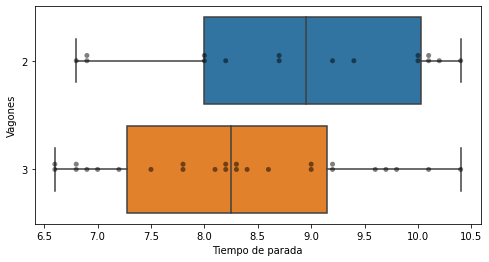

In [7]:
print("Para los casos cuando hay poca ocupacion")
display(pg.homoscedasticity(data=df[df['Ocupación'] == 'Poca'], dv='Tiempo de parada', group='Vagones'))
print('\n')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="Vagones", x="Tiempo de parada", data=df[df['Ocupación'] == 'Poca'], ax=ax, orient='h')
sns.swarmplot(y="Vagones", x="Tiempo de parada", data=df[df['Ocupación'] == 'Poca'], color='black', alpha = 0.5, ax=ax, orient='h');

df1 = df[(df['Ocupación'] == 'Poca') & (df['Vagones'] == 2)]['Tiempo de parada']
df2 = df[(df['Ocupación'] == 'Poca') & (df['Vagones'] == 3)]['Tiempo de parada']
pg.ttest(x=df1, y=df2, correction=False)

Para los casos cuando hay mucha ocupacion


,W,pval,equal_var
levene,1.734622,0.195508,True


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.88165,39,two-sided,0.383368,"[-1.34, 0.53]",0.282266,0.424,0.138093


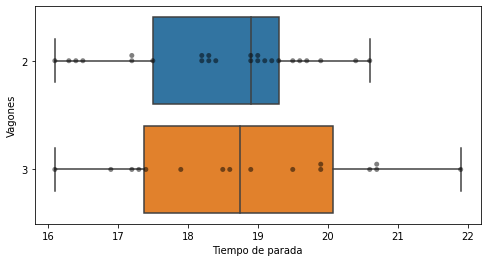

In [8]:
print("Para los casos cuando hay mucha ocupacion")
display(pg.homoscedasticity(data=df[df['Ocupación'] == 'Mucha'], dv='Tiempo de parada', group='Vagones'))
print('\n')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="Vagones", x="Tiempo de parada", data=df[df['Ocupación'] == 'Mucha'], ax=ax, orient='h')
sns.swarmplot(y="Vagones", x="Tiempo de parada", data=df[df['Ocupación'] == 'Mucha'], color='black', alpha = 0.5, ax=ax, orient='h');

df1 = df[(df['Ocupación'] == 'Mucha') & (df['Vagones'] == 2)]['Tiempo de parada']
df2 = df[(df['Ocupación'] == 'Mucha') & (df['Vagones'] == 3)]['Tiempo de parada']
pg.ttest(x=df1, y=df2, correction=False)

Comprobamos la hipotesis de que las medias poblaciones en el tiempo de parada cuando hay poca ocupacion es igual al tiempo de parada cuando hay mucha ocupacion

,W,pval,equal_var
levene,0.744575,0.390747,True


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-34.775634,81,two-sided,1.862711e-50,"[-10.71, -9.55]",7.634798,4.178e+46,1.0


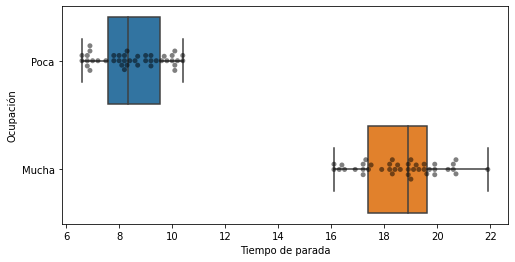

In [9]:
display(pg.homoscedasticity(data=df, dv='Tiempo de parada', group='Ocupación'))
print('\n')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(y="Ocupación", x="Tiempo de parada", data=df, ax=ax, orient='h')
sns.swarmplot(y="Ocupación", x="Tiempo de parada", data=df, color='black', alpha = 0.5, ax=ax, orient='h');

df1 = df[df['Ocupación'] == 'Poca']['Tiempo de parada']
df2 = df[df['Ocupación'] == 'Mucha']['Tiempo de parada']
pg.ttest(x=df1, y=df2, correction=False)